## Rainfall prediction using Multiple Linear Regression Model


In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import math

In [ ]:
df = pd.read_csv("/content/sample_data/raindata.csv")
df

,Year,Month,Ave mm,Liters/m^2,Number of wet days
0,2012.0,Jan,0.31,0.20,1.0
1,2012.0,Feb,1.20,0.78,3.0
2,2012.0,Mar,2.40,1.50,2.0
3,2012.0,Apr,55.70,3.36,5.0
4,2012.0,May,38.20,12.20,6.0
...,...,...,...,...,...
176,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

Year                  61
Month                 60
Ave mm                61
Liters/m^2            62
Number of wet days    61
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df=df.drop('Year', axis=1)

In [ ]:
df

,Month,Ave mm,Liters/m^2,Number of wet days
0,Jan,0.31,0.20,1.0
1,Feb,1.20,0.78,3.0
2,Mar,2.40,1.50,2.0
3,Apr,55.70,3.36,5.0
4,May,38.20,12.20,6.0
...,...,...,...,...
115,Aug,667.10,36.60,12.0
116,Sept,213.60,36.60,10.0
117,Oct,109.40,36.60,2.0
118,Nov,33.30,36.60,2.0


In [ ]:
df.corr()

,Ave mm,Liters/m^2,Number of wet days
Ave mm,1.000000,0.732222,0.637009
Liters/m^2,0.732222,1.000000,0.674995
Number of wet days,0.637009,0.674995,1.000000


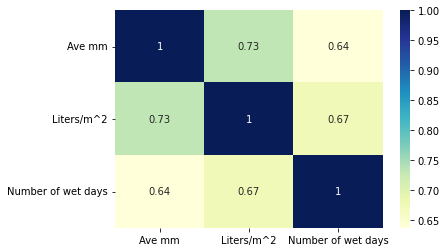

In [ ]:
sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

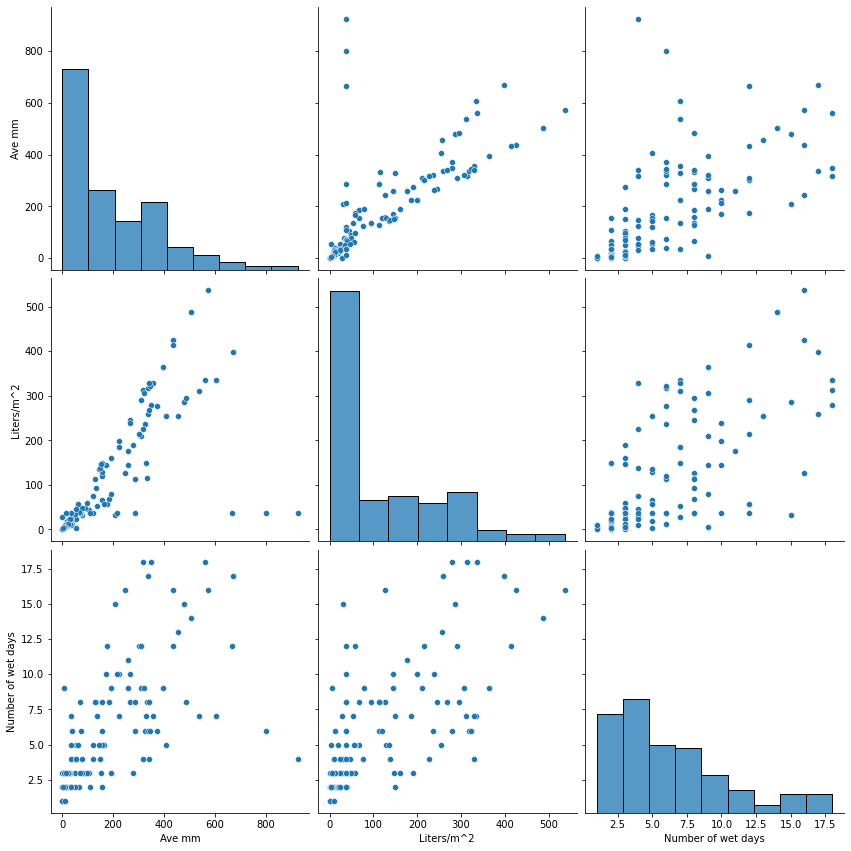

In [ ]:
sb.pairplot(df,height=4)

**Ave mm and Liters/m^2 are linearly correlated. Hence Linear Regression Model can be implemented.**

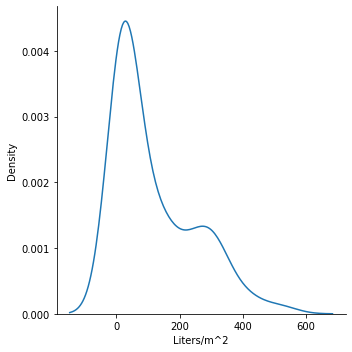

In [ ]:
sb.displot(data=df, x="Liters/m^2", kind="kde")

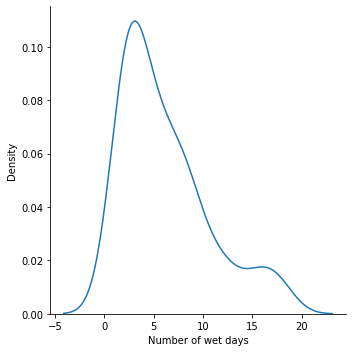

In [ ]:
sb.displot(data=df, x="Number of wet days", kind="kde")

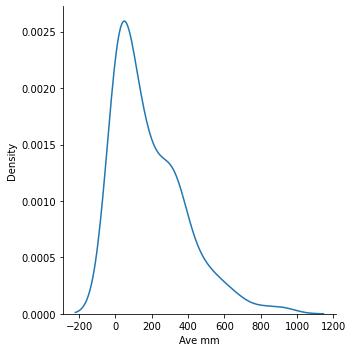

In [ ]:
sb.displot(data=df, x="Ave mm", kind="kde")

**From the distribution plot, we can see data is normally distributed.**

# Data Extraction for every month

In [ ]:
#import model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
#all months
months=df.Month.unique()
months

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept',
       'Oct', 'Nov', 'Dce'], dtype=object)

In [ ]:
#extracting data for each month
data=[]
for month in months:
  data.append(df[df.Month==month])
month_keys={}

for key in range(0,12):
  month_keys[months[key]]=key

In [ ]:
data[0] #data for January

,Month,Ave mm,Liters/m^2,Number of wet days
0,Jan,0.31,0.20,1.0
12,Jan,0.75,27.20,3.0
24,Jan,0.65,0.35,1.0
36,Jan,0.90,0.10,1.0
48,Jan,0.26,0.15,1.0
60,Jan,11.20,7.20,2.0
72,Jan,10.00,9.70,1.0
84,Jan,7.00,4.60,2.0
96,Jan,5.10,2.40,2.0
108,Jan,4.10,2.40,2.0


In [ ]:
#Prediction function
def predict_for(month):
  month_key = month_keys[month]
  X=data[month_key].drop(['Number of wet days','Month'],axis=1)
  y=data[month_key]['Number of wet days']
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)
  # creating a regression model
  model = LinearRegression()

  # fitting the model
  model.fit(X_train, y_train)
  mm_mean=data[month_key]['Ave mm'].mean()
  liters_mean=data[month_key]['Liters/m^2'].mean()
  prediction_data=pd.DataFrame(np.array([[mm_mean,liters_mean]]),columns=['Ave mm','Liters/m^2'])

  #prediction=model.predict(np.array([(123,32)]))
  predictions = model.predict(prediction_data)
  test_data_prediction=model.predict(X_test)

  # model evaluation
  print("Model evaluation based on previous record:")
  print('mean_squared_error : ', mean_squared_error(y_test, test_data_prediction))
  print('mean_absolute_error : ', mean_absolute_error(y_test, test_data_prediction))
  print("-"*50)
  print(f"Average wet days for {month}:",data[month_key]['Number of wet days'].mean())
  print(f"Model prediction for {month} (No of wet days):",math.ceil(predictions[0]))
  if(predictions[0]<=5):
    print("Average Rainfall is predicted")
  elif(predictions[0]<=10):
    print("Medium Rainfall is predicted")
  else:
    print("Heavy Rainfall")

##Multiple Linear Regression Model Visualization

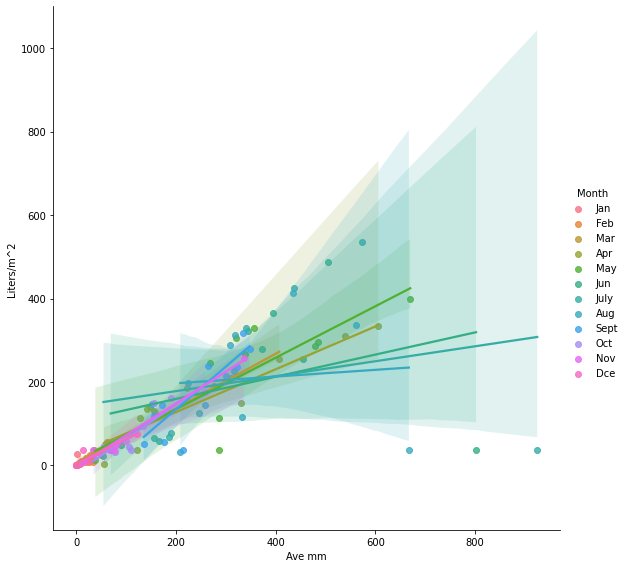

In [ ]:
sb.lmplot(data=df, x="Ave mm", y="Liters/m^2", hue="Month",height=8)

In [ ]:
#use this function for prediction. Pass month key as parameter
print(months)
print("-"*50)
predict_for('Sept')
print("-"*50)

['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'July' 'Aug' 'Sept' 'Oct' 'Nov' 'Dce']
--------------------------------------------------
Model evaluation based on previous record:
mean_squared_error :  50.46279126066785
mean_absolute_error :  6.3592306687726685
--------------------------------------------------
Average wet days for Sept: 8.8
Model prediction for Sept (No of wet days): 8
Medium Rainfall is predicted
--------------------------------------------------
